In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects
import seaborn as sns

# Data Visualization

### Load the data

In [22]:
df = pd.read_csv('dataset/spotify_songs_restructured_cleaned.csv', sep=',')
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,danceability,energy,key,loudness,speechiness,liveness,valence,tempo,duration_ms,popularity_category,tempo_category,loudness_category,release_month
0,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.000000,Call You Mine - The Remixes,2019-07-19 00:00:00,pop,0.718000,0.930,7.00000,-3.778000,0.1020,0.204000,0.2770,121.956,225617.442012,Medium Popularity,Fast,Loud,July
1,Someone You Loved - Future Humans Remix,Lewis Capaldi,42.321358,Someone You Loved (Future Humans Remix),2019-03-05 00:00:00,pop,0.650000,0.833,1.00000,-4.672000,0.0359,0.083300,0.7250,123.976,189052.000000,Medium Popularity,Fast,Loud,March
2,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67.000000,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11 00:00:00,pop,0.675000,0.919,8.00000,-5.385000,0.1270,0.143000,0.5850,124.982,163049.000000,High Popularity,Fast,Moderate,July
3,Never Really Over - R3HAB Remix,Katy Perry,62.000000,Never Really Over (R3HAB Remix),2019-07-26 00:00:00,pop,0.449000,0.856,5.35558,-4.788000,0.0623,0.176000,0.1520,112.648,187675.000000,High Popularity,Moderate,Loud,July
4,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69.000000,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29 00:00:00,pop,0.542000,0.903,4.00000,-2.419000,0.0434,0.191065,0.3670,127.936,207619.000000,High Popularity,Fast,Loud,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20928,City Of Lights - Official Radio Edit,Lush & Simon,42.000000,City Of Lights (Vocal Mix),2014-04-28 00:00:00,edm,0.654992,0.922,2.00000,-1.814000,0.0936,0.066800,0.2100,128.170,204375.000000,Medium Popularity,Fast,Loud,April
20929,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20.000000,Closer Remixed,2013-03-08 00:00:00,edm,0.522000,0.786,0.00000,-4.462000,0.0420,0.375000,0.4000,128.041,225617.442012,Very Low Popularity,Fast,Loud,March
20930,Sweet Surrender - Radio Edit,Starkillers,14.000000,Sweet Surrender (Radio Edit),2014-04-21 00:00:00,edm,0.529000,0.821,5.35558,-4.899000,0.0481,0.150000,0.4360,127.989,210112.000000,Very Low Popularity,Fast,Loud,April
20931,Only For You - Maor Levi Remix,Mat Zo,15.000000,Only For You (Remixes),2014-01-01 00:00:00,edm,0.626000,0.888,2.00000,-6.715209,0.1090,0.343000,0.3080,128.008,367432.000000,Very Low Popularity,Fast,Moderate,January


### Popularity Distribution over genres

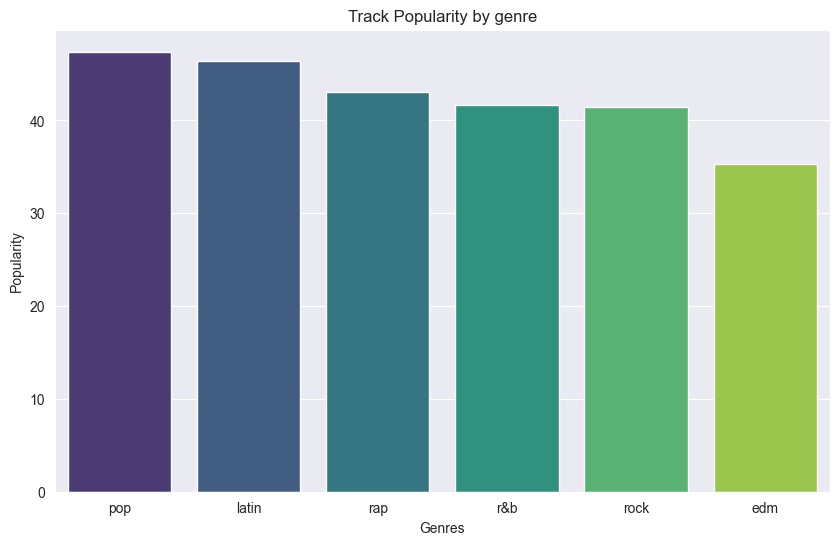

In [23]:
data = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False)

plt.title('Track Popularity by genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

plt.show()

### Popularity Distribution over months

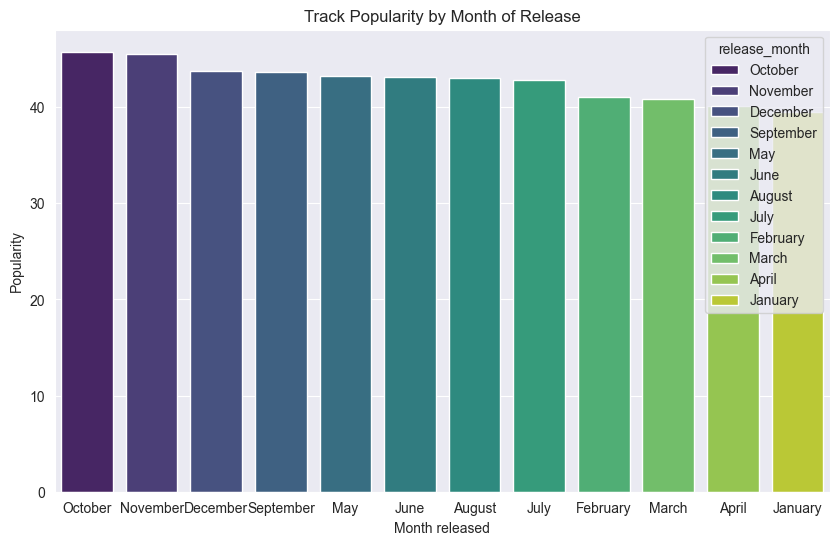

In [24]:
data = df.groupby('release_month')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=True
            )

plt.title('Track Popularity by Month of Release')
plt.xlabel('Month released')
plt.ylabel('Popularity')

plt.show()

### Total Tracks per Genre

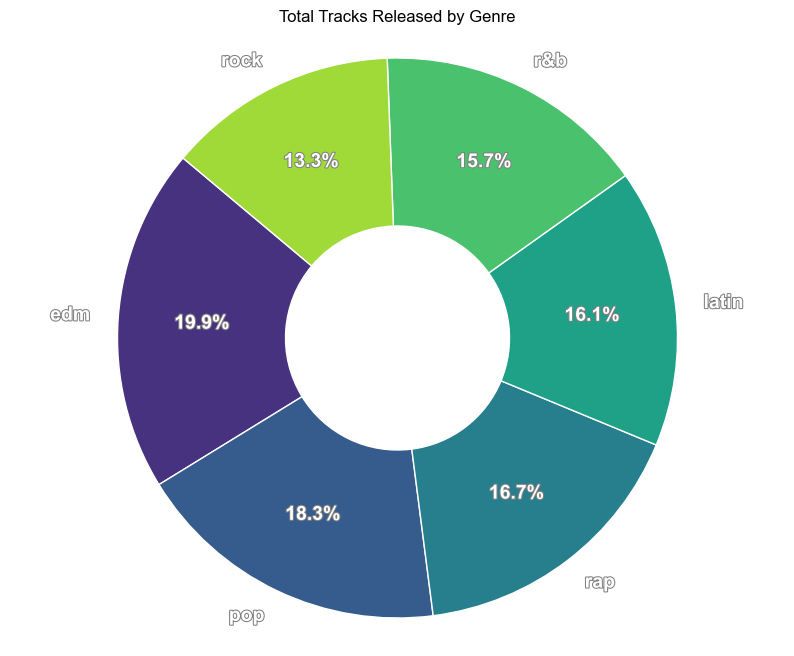

In [25]:
df = pd.read_csv('dataset/spotify_songs_cleaned.csv', sep=',')

genre_counts = df['playlist_genre'].value_counts()

def add_outline(text, linewidth=1.5, foreground='grey'):
    text.set_path_effects([path_effects.Stroke(linewidth=linewidth, foreground=foreground), path_effects.Normal()])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,
                                  colors=sns.color_palette('viridis', len(genre_counts)),
                                  textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
                                  wedgeprops={'width': 0.6}, pctdistance=0.7)

# Add outline to the text
for text in texts + autotexts:
    add_outline(text)

plt.title('Total Tracks Released by Genre', color='black')
plt.axis('equal')
plt.show()

### Tempo Distribution by Year

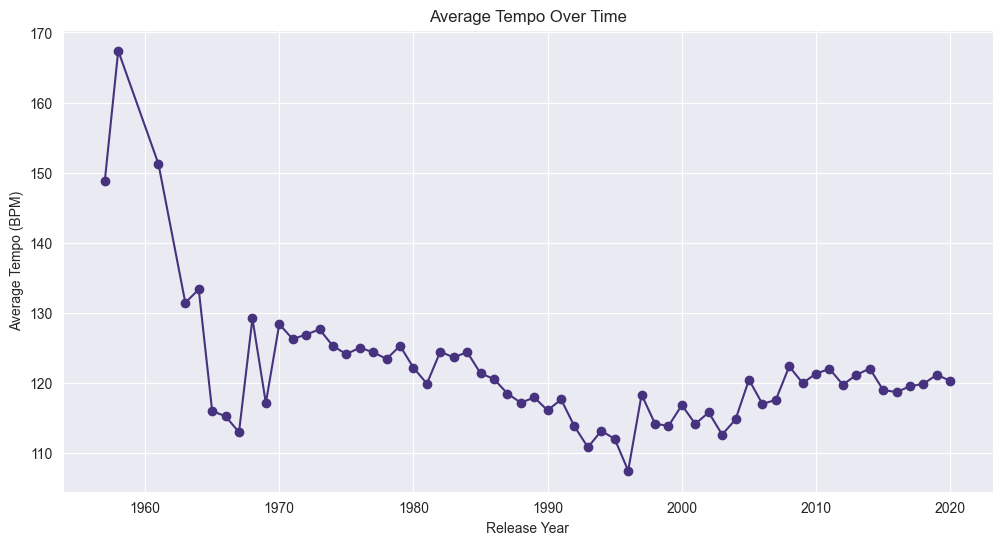

In [26]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

colors=sns.color_palette('viridis', len(genre_counts))

tempo_over_time = df.groupby(df['track_album_release_date'].dt.year)['tempo'].mean()


plt.figure(figsize=(12, 6))
tempo_over_time.plot(kind='line', marker='o', color=colors)
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Popularity Categories Distribution 

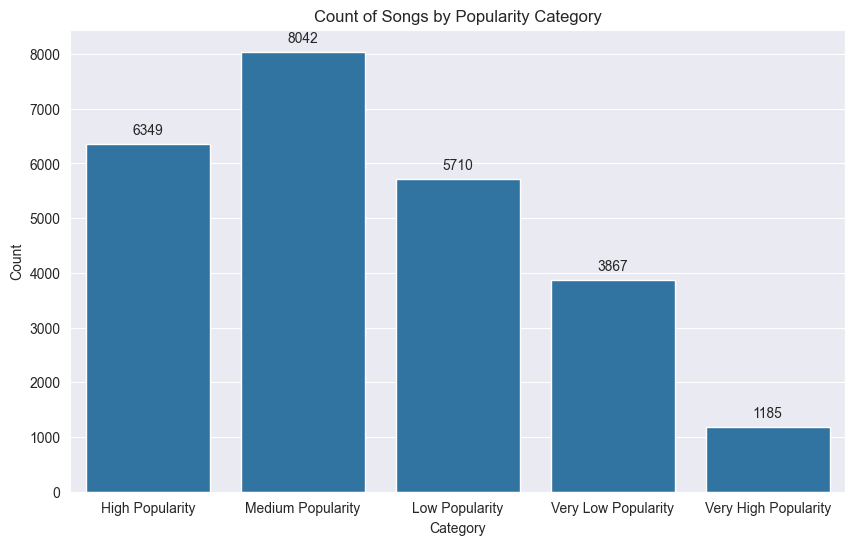

In [27]:
category_counts = df['popularity_category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='popularity_category')
plt.title('Count of Songs by Popularity Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Tempo Categories Distribution

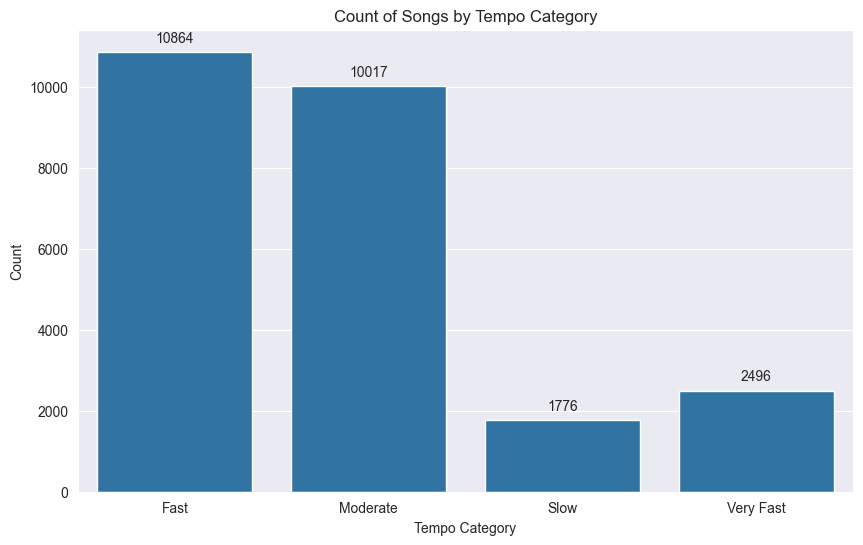

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tempo_category')
plt.title('Count of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Loudness Categories Distribution

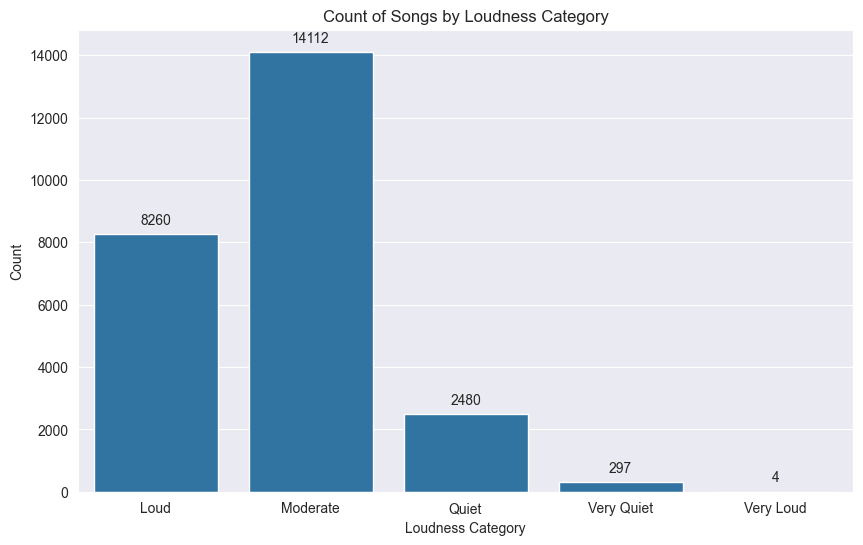

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='loudness_category')
plt.title('Count of Songs by Loudness Category')
plt.xlabel('Loudness Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()